# **Word Embedding**

# Word2Vec – CBOW & Skip Gram

In [1]:
from gensim.models import Word2Vec
import numpy as np

In [2]:
sentences = [['drink','not','good'],
			['felt','superb'],
			['just','good','ambience'],
			['bad','taste'],
			['parking','problem'],
            ['fantastic','food']]
y = np.array([0,1,1,0,0,1])

In [3]:
model = Word2Vec(sentences, min_count=1,size=100)
print(model)

Word2Vec(vocab=13, size=100, alpha=0.025)


In [4]:
words = list(model.wv.vocab)
print(words)

['drink', 'not', 'good', 'felt', 'superb', 'just', 'ambience', 'bad', 'taste', 'parking', 'problem', 'fantastic', 'food']


In [5]:
print(model['drink'])
print(model['fantastic'])

[-4.2436048e-03 -4.1220831e-03  3.1618101e-03 -3.0090360e-03
  1.9687836e-03 -4.6416782e-03  4.3861889e-03 -3.0191434e-03
 -3.6970514e-03  3.0547085e-03  2.5186809e-03  3.0036757e-03
 -2.0774447e-03  1.6956449e-03  2.2676999e-03  5.7546335e-04
 -3.8063268e-03  8.2449603e-04 -7.3150569e-04  2.4440160e-03
  2.5070016e-03 -4.3423581e-03  4.1471766e-03 -9.8035391e-04
  1.7582733e-03 -4.6548764e-03 -4.9185110e-03  2.3565027e-03
 -1.8972652e-03 -5.2325056e-05  3.3159440e-03 -4.9613771e-04
 -2.3971973e-03 -3.1024026e-04 -7.9904136e-04 -7.2215719e-04
 -4.4854614e-03 -1.1314862e-04 -9.9729816e-04  3.4924583e-03
 -4.8674648e-03 -2.6819853e-03  1.5233099e-04 -1.3399849e-03
 -1.0124177e-03  6.7498372e-04 -7.6356373e-04  3.8486298e-03
 -1.4010652e-03 -4.0506218e-03  3.3444824e-04 -4.5416532e-03
  9.1856951e-04  1.9918932e-03 -2.7422912e-03  8.7375747e-04
 -1.8751823e-03 -1.0758378e-03 -9.8920637e-04 -1.0966106e-03
  2.5285271e-03 -4.7319178e-03  4.4661299e-03 -1.4600701e-03
 -3.3145386e-03 -1.10036

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [6]:
means_0 = np.mean(model[sentences[0]],axis=0)
means = []
for i in sentences :
    row_means = np.mean(model[i],axis=0)
    means.append(row_means)
means = np.array(means) 
X = means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [7]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1211,
                                  n_estimators=100,oob_score=True)
model_rf.fit( X , y )
test_sentences = [['bad','food'],['just','fantastic']]
test_means = []
for i in test_sentences :
    row_means = np.mean(model[i],axis=0)
    test_means.append(row_means)
num_test_means = np.array(test_means) 
X_test = num_test_means
y_pred = model_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [8]:
model.save('model.bin')

In [9]:
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=13, size=100, alpha=0.025)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


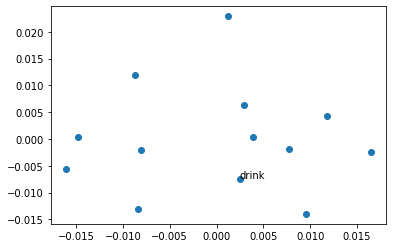

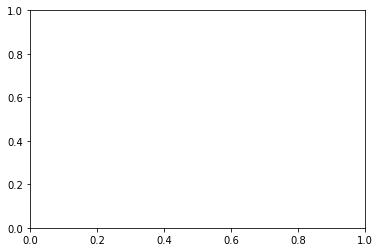

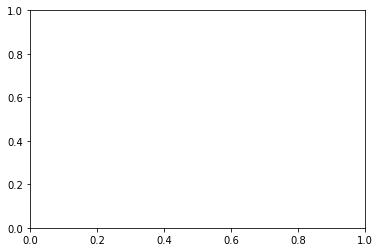

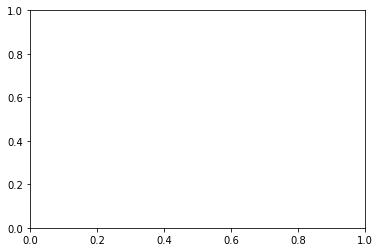

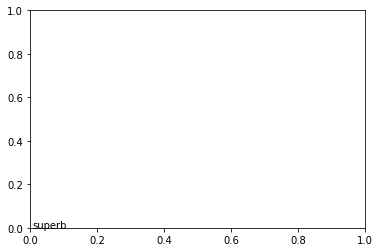

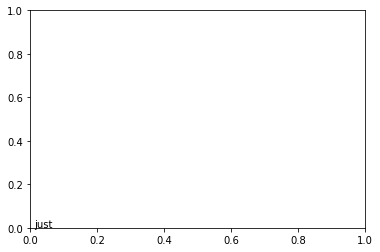

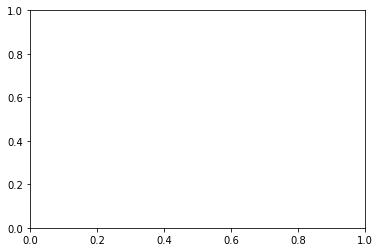

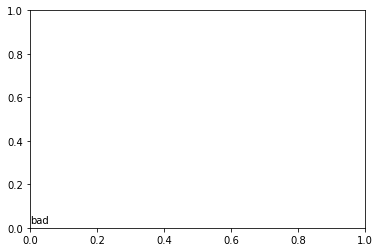

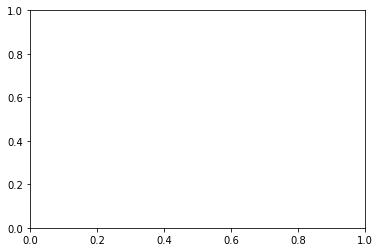

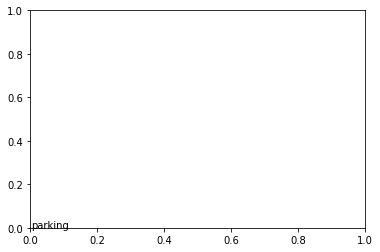

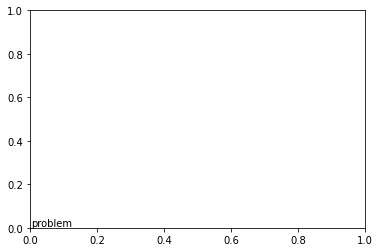

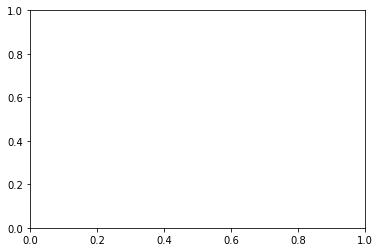

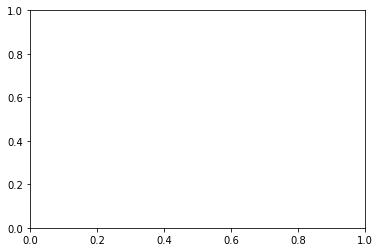

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
vwords = list(model.wv.vocab)
for j, word in enumerate(vwords):
  pyplot.annotate(word, xy=(result[j, 0], result[j, 1]))
  pyplot.show()